---
---

<h1 align='center'> Anamoly Detection </h1>
<h2 align='center'> Transfer-Learning Models</h2> 


1.   ML[Smote(Bert features extracted from pretrained model)]
2.   Bert+NN full trainable

---
---

In [2]:
#Import Libraries and upload clean data into workspace
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

import warnings
warnings.filterwarnings('ignore')

## Read File

In [ ]:
import pandas as pd
data = pd.read_csv("cleaned_2k.data.csv")

#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
#Print the dataframe
data

,X_data,Y_data
0,1 81109 203615 148 INFO dfs DataNode PacketResponder PacketResponder 1 for block blk38865049064139660 terminating dc2c74b7,0
1,2 81109 203807 222 INFO dfs DataNode PacketResponder PacketResponder 0 for block blk6952295868487656571 terminating dc2c74b7,0
2,3 81109 204005 35 INFO dfs FSNamesystem BLOCK NameSystem addStoredBlock blockMap updated 10 251 73 220 50010 is added to blk7128370237687728475 size 67108864 5d5de21c,0
3,4 81109 204015 308 INFO dfs DataNode PacketResponder PacketResponder 2 for block blk8229193803249955061 terminating dc2c74b7,0
4,5 81109 204106 329 INFO dfs DataNode PacketResponder PacketResponder 2 for block blk6670958622368987959 terminating dc2c74b7,0
...,...,...
1995,1996 81111 101621 24902 INFO dfs DataNode DataXceiver Receiving block blk4198733391373026104 src 10 251 106 10 46843 dest 10 251 106 10 50010 09a53393,0
1996,1997 81111 101735 26595 INFO dfs DataNode PacketResponder Received block blk5815145248455404269 of size 67108864 from 10 251 121 224 e3df2680,0
1997,1998 81111 101804 26494 INFO dfs DataNode DataXceiver Receiving block blk295306975763175640 src 10 250 9 207 53270 dest 10 250 9 207 50010 09a53393,0
1998,1999 81111 101954 26414 INFO dfs DataNode PacketResponder PacketResponder 0 for block blk5225719677049010638 terminating dc2c74b7,0


## Exploratory Data Analysis

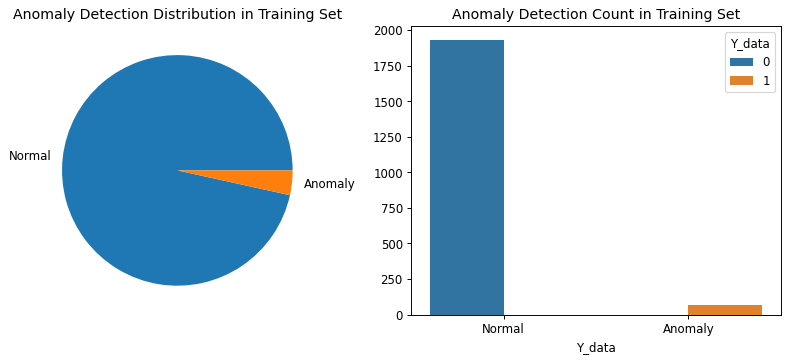

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), dpi=85)
plt.tight_layout()

data.groupby('Y_data').count()['X_data'].plot(kind='pie', ax=axes[0], labels=['Normal', 'Anomaly'])
sns.countplot(x=data['Y_data'], hue=data['Y_data'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Normal', 'Anomaly'])
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

axes[0].set_title('Anomaly Detection Distribution in Training Set', fontsize=12)
axes[1].set_title('Anomaly Detection Count in Training Set', fontsize=12)

plt.show()

## Specs and Dependencies

In [ ]:
!pip3 install tensorflow_text
!pip3 install tensorflow_hub
!pip3 install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#cpu
split_bar = '='*20
print(f"{split_bar} CPU {split_bar}")
cpu_info = !lscpu
for inf_item in cpu_info.get_list():
  print(inf_item)

==================== CPU ====================
Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hy

In [ ]:
print(f"{split_bar} RAM {split_bar}")
!free -h #ram
print(f"{split_bar} CUDA {split_bar}")
!nvcc --version #cuda

==================== RAM ====================
              total        used        free      shared  buff/cache   available
Mem:            12G        884M        8.5G        1.3M        3.3G         11G
Swap:            0B          0B          0B
==================== CUDA ====================
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
!nvidia-smi

/device:GPU:0
Num GPUs Available:  1
Fri Sep 23 23:22:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    30W /  70W |    324MiB / 15109MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                   

## **Bert Models** (*Hugging Face*)

In [ ]:
map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/4',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/2',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

print('Available Pretrained Models:',*list(map_name_to_handle.keys()), sep = "\n")

Available Pretrained Models:
bert_en_uncased_L-12_H-768_A-12
bert_en_cased_L-12_H-768_A-12
bert_multi_cased_L-12_H-768_A-12
small_bert/bert_en_uncased_L-2_H-128_A-2
small_bert/bert_en_uncased_L-2_H-256_A-4
small_bert/bert_en_uncased_L-2_H-512_A-8
small_bert/bert_en_uncased_L-2_H-768_A-12
small_bert/bert_en_uncased_L-4_H-128_A-2
small_bert/bert_en_uncased_L-4_H-256_A-4
small_bert/bert_en_uncased_L-4_H-512_A-8
small_bert/bert_en_uncased_L-4_H-768_A-12
small_bert/bert_en_uncased_L-6_H-128_A-2
small_bert/bert_en_uncased_L-6_H-256_A-4
small_bert/bert_en_uncased_L-6_H-512_A-8
small_bert/bert_en_uncased_L-6_H-768_A-12
small_bert/bert_en_uncased_L-8_H-128_A-2
small_bert/bert_en_uncased_L-8_H-256_A-4
small_bert/bert_en_uncased_L-8_H-512_A-8
small_bert/bert_en_uncased_L-8_H-768_A-12
small_bert/bert_en_uncased_L-10_H-128_A-2
small_bert/bert_en_uncased_L-10_H-256_A-4
small_bert/bert_en_uncased_L-10_H-512_A-8
small_bert/bert_en_uncased_L-10_H-768_A-12
small_bert/bert_en_uncased_L-12_H-128_A-2
small

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

# Choose the Model
bert_model_name = 'small_bert/bert_en_uncased_L-12_H-768_A-12' 

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

#tf.compat.v1.disable_eager_execution()
bert_preprocess = hub.KerasLayer(tfhub_handle_preprocess, name='preprocess', trainable=False)
bert_encoder = hub.KerasLayer(tfhub_handle_encoder, name='encoder', trainable=False)

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


## Feature Extraction

In [ ]:
from tqdm import tqdm
import csv
import psutil

#features = []
with open("BertFeatures_2k.csv",'w') as f:
  writer = csv.writer(f, delimiter=',', lineterminator='\n')
  writer.writerow(list(range(768)))
  
  for i in tqdm(data['X_data']):
    # clear tensorflow ram when it exceeds 90 percent of ram usage
    if psutil.virtual_memory().percent > 90:
      tf.keras.backend.clear_session()
    
    bert_results = bert_encoder(bert_preprocess([i]))
    bert_out = bert_results["pooled_output"].numpy()[0]
    #print(bert_out.shape)
    #features.append(bert_out)
    writer.writerow(bert_out)
  #features = np.array(features)

100%|██████████| 2000/2000 [06:20<00:00,  5.25it/s]


In [ ]:
#Saving features
#features = features.reshape(len(data),768)
#np.save('bert-features',features)
features = pd.read_csv("BertFeatures_2k.csv") 
features.shape

(2000, 768)

---
# **Transfer Learning Approches**
*restart the kernel for faster run-time as features are extracted from bert transformer and saved*

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
x = pd.read_csv("BertFeatures_2k.csv")
data = pd.read_csv("cleaned_2k.data.csv")
y = data['Y_data'].apply(lambda x: -1 if x == 0 else 1)

## Solving Data Imbalance 

In [2]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', x.shape)
print('Resample dataset shape', x_smote.shape)
SmoteData = x_smote.copy()
SmoteData['Y_data'] = y_smote
SmoteData.groupby('Y_data').count()

Original dataset shape (2000, 768)
Resample dataset shape (3862, 768)


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Y_data,,,,,,,,,,,,,,,,,,,,,
-1,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931
1,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931


---
### **1--> ML models with Hyper-parameter tuning**
---

## Train/Test/Validation Data-Split

In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# split train dataset into train, validation and test sets
train_features, test_features, train_labels, test_labels = train_test_split(x_smote, y_smote,
                                                                            random_state=2022, 
                                                                            test_size=0.2)

class_names = ['Normal','Anomaly']

#### *Searching for the best model*
These above features-data is given as inputs for ML-Classifiers and best out them is found

In [4]:
from sklearn.svm import OneClassSVM
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, SGDOneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, IsolationForest
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names = ["Lin OneClassSVM", "Poly OneClassSVM", "RBF OneClassSVM", 
         "Sig OneClassSVM", "Lin OneClassSVM - SGD", "LOF", "IsolationForest", 
         "Lin SVM", "Poly SVM", "RBF SVM", "Sig SVM", "lbfgs Log-Reg", 
         "saga Log-Reg", "SGD", "Naive Bayes", "Gaussian Process", "Decision Tree", 
         "Random Forest", "KNN", "GradientBoostingClassifier", "Neural Net", 
         "AdaBoost", "QDA", "LGBM", "XGB"]

classifiers = [OneClassSVM(kernel='linear',max_iter=10000,verbose=1), OneClassSVM(kernel='poly',max_iter=10000,verbose=1), 
               OneClassSVM(kernel='rbf',max_iter=10000,verbose=1), OneClassSVM(kernel='sigmoid',max_iter=10000,verbose=1),
               SGDOneClassSVM(max_iter=10000,verbose=1), LocalOutlierFactor(n_neighbors=7,novelty=True), IsolationForest(verbose=1),
               SVC(kernel='linear',max_iter=10000,verbose=1), SVC(kernel='poly',max_iter=10000,verbose=1), 
               SVC(kernel='rbf',max_iter=10000,verbose=1), SVC(kernel='sigmoid',max_iter=10000,verbose=1),
               LogisticRegression(solver='lbfgs',verbose=1), LogisticRegression(solver='saga',verbose=1), SGDClassifier(verbose=1), 
               GaussianNB(), GaussianProcessClassifier(), DecisionTreeClassifier(max_depth=25), 
               RandomForestClassifier(max_depth=25,verbose=1), KNeighborsClassifier(n_neighbors=7), GradientBoostingClassifier(max_depth=5,verbose=1),
               MLPClassifier(max_iter=2500,early_stopping=True,verbose=1), AdaBoostClassifier(), 
               QuadraticDiscriminantAnalysis(), LGBMClassifier(verbose=1), XGBClassifier(verbose=1)]

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

def runML():
    for i in range(len(class_names)):
        if (i == 0):
            ii = -1
        else:
            ii = 1
        print("CLASS - (",ii,") -->",class_names[i])

    fig = plt.figure(figsize=(18,20))
    fig.tight_layout()
    nof_clsfrs = len(names)
    Metrics = {}
    
    print('\nClassification Report for each Classifier:')
    for i in range(nof_clsfrs):
        metric = []
        classifier = classifiers[i]
        plt.subplot(nof_clsfrs//5,5,i+1)
        plt.xticks([])
        plt.yticks([])
    
        print(f'\n\nClassifier: {str(classifier)[:30]}...')
        start_time = time.time(); classifier.fit(train_features, train_labels); metric.append(time.time() - start_time); 
        start_time = time.time(); test_pred = classifier.predict(test_features); metric.append(time.time() - start_time);
        acc = accuracy_score(test_labels,test_pred) *100; metric.append(acc);
        Metrics[names[i]] = metric
        #print(f'Accuracy  is {acc}%, Report:')
        print(classification_report(test_labels, test_pred))
    
        plt.gca().set_title(names[i])
        CM = confusion_matrix(test_labels, test_pred)
        plt.imshow(CM,interpolation='nearest',cmap='summer')
        for (i, j), z in np.ndenumerate(CM):
            plt.text(j, i, z, ha='center', va='center')
        plt.xticks(np.arange(len(class_names)),class_names, fontsize=8)
        plt.yticks(np.arange(len(class_names)))
        plt.grid(False)
    plt.show()
    return Metrics

#### *Fitting and Ploting results*

CLASS - ( -1 ) --> Normal
CLASS - ( 1 ) --> Anomaly

Classification Report for each Classifier:


Classifier: OneClassSVM(kernel='linear', m...
[LibSVM]              precision    recall  f1-score   support

          -1       0.47      0.51      0.49       377
           1       0.49      0.45      0.47       396

    accuracy                           0.48       773
   macro avg       0.48      0.48      0.48       773
weighted avg       0.48      0.48      0.48       773



Classifier: OneClassSVM(kernel='poly', max...
[LibSVM]              precision    recall  f1-score   support

          -1       0.47      0.51      0.49       377
           1       0.49      0.45      0.47       396

    accuracy                           0.48       773
   macro avg       0.48      0.48      0.48       773
weighted avg       0.48      0.48      0.48       773



Classifier: OneClassSVM(max_iter=10000, ve...
[LibSVM]              precision    recall  f1-score   support

          -1       0.53    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


              precision    recall  f1-score   support

          -1       0.65      0.13      0.21       377
           1       0.53      0.93      0.68       396

    accuracy                           0.54       773
   macro avg       0.59      0.53      0.44       773
weighted avg       0.59      0.54      0.45       773



Classifier: SVC(kernel='linear', max_iter=...
[LibSVM]              precision    recall  f1-score   support

          -1       0.98      0.73      0.84       377
           1       0.79      0.98      0.88       396

    accuracy                           0.86       773
   macro avg       0.89      0.86      0.86       773
weighted avg       0.88      0.86      0.86       773



Classifier: SVC(kernel='poly', max_iter=10...
[LibSVM]              precision    recall  f1-score   support

          -1       0.64      0.40      0.49       377
           1       0.58      0.79      0.67       396

    accuracy                           0.60       773
   macro avg    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

          -1       0.87      0.77      0.81       377
           1       0.80      0.89      0.84       396

    accuracy                           0.83       773
   macro avg       0.83      0.83      0.83       773
weighted avg       0.83      0.83      0.83       773



Classifier: LogisticRegression(solver='sag...
max_iter reached after 2 seconds
              precision    recall  f1-score   support

          -1       0.81      0.74      0.78       377
           1       0.77      0.84      0.80       396

    accuracy                           0.79       773
   macro avg       0.79      0.79      0.79       773
weighted avg       0.79      0.79      0.79       773



Classifier: SGDClassifier(verbose=1)...
-- Epoch 1
Norm: 305.74, NNZs: 768, Bias: 1.669262, T: 3089, Avg. loss: 392.679668
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 274.75, NNZs: 768, Bias: 2.677343, T: 6178, Avg. loss: 148.866906
Total training time: 0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Norm: 119.01, NNZs: 768, Bias: 6.223358, T: 135916, Avg. loss: 4.490046
Total training time: 0.17 seconds.
-- Epoch 45
Norm: 118.19, NNZs: 768, Bias: 6.223493, T: 139005, Avg. loss: 4.363360
Total training time: 0.18 seconds.
-- Epoch 46
Norm: 117.22, NNZs: 768, Bias: 6.224251, T: 142094, Avg. loss: 4.239875
Total training time: 0.18 seconds.
-- Epoch 47
Norm: 116.40, NNZs: 768, Bias: 6.224023, T: 145183, Avg. loss: 4.165443
Total training time: 0.19 seconds.
-- Epoch 48
Norm: 115.52, NNZs: 768, Bias: 6.223748, T: 148272, Avg. loss: 3.963979
Total training time: 0.19 seconds.
-- Epoch 49
Norm: 114.70, NNZs: 768, Bias: 6.290018, T: 151361, Avg. loss: 3.879835
Total training time: 0.19 seconds.
-- Epoch 50
Norm: 113.85, NNZs: 768, Bias: 6.225054, T: 154450, Avg. loss: 3.919364
Total training time: 0.20 seconds.
-- Epoch 51
Norm: 113.06, NNZs: 768, Bias: 6.224831, T: 157539, Avg. loss: 3.822708
Total training time: 0.20 seconds.
-- Epoch 52
Norm: 112.19, NNZs: 768, Bias: 6.162745, T: 1606

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       377
           1       0.99      1.00      0.99       396

    accuracy                           0.99       773
   macro avg       0.99      0.99      0.99       773
weighted avg       0.99      0.99      0.99       773



Classifier: KNeighborsClassifier(n_neighbo...
              precision    recall  f1-score   support

          -1       1.00      0.58      0.73       377
           1       0.71      1.00      0.83       396

    accuracy                           0.79       773
   macro avg       0.86      0.79      0.78       773
weighted avg       0.85      0.79      0.78       773



Classifier: GradientBoostingClassifier(max...
      Iter       Train Loss   Remaining Time 
         1           1.3092            1.69m
         2           1.2437            1.58m
         3           1.2117            1.56m
         4           1.1463            1.53m
         5           1.1

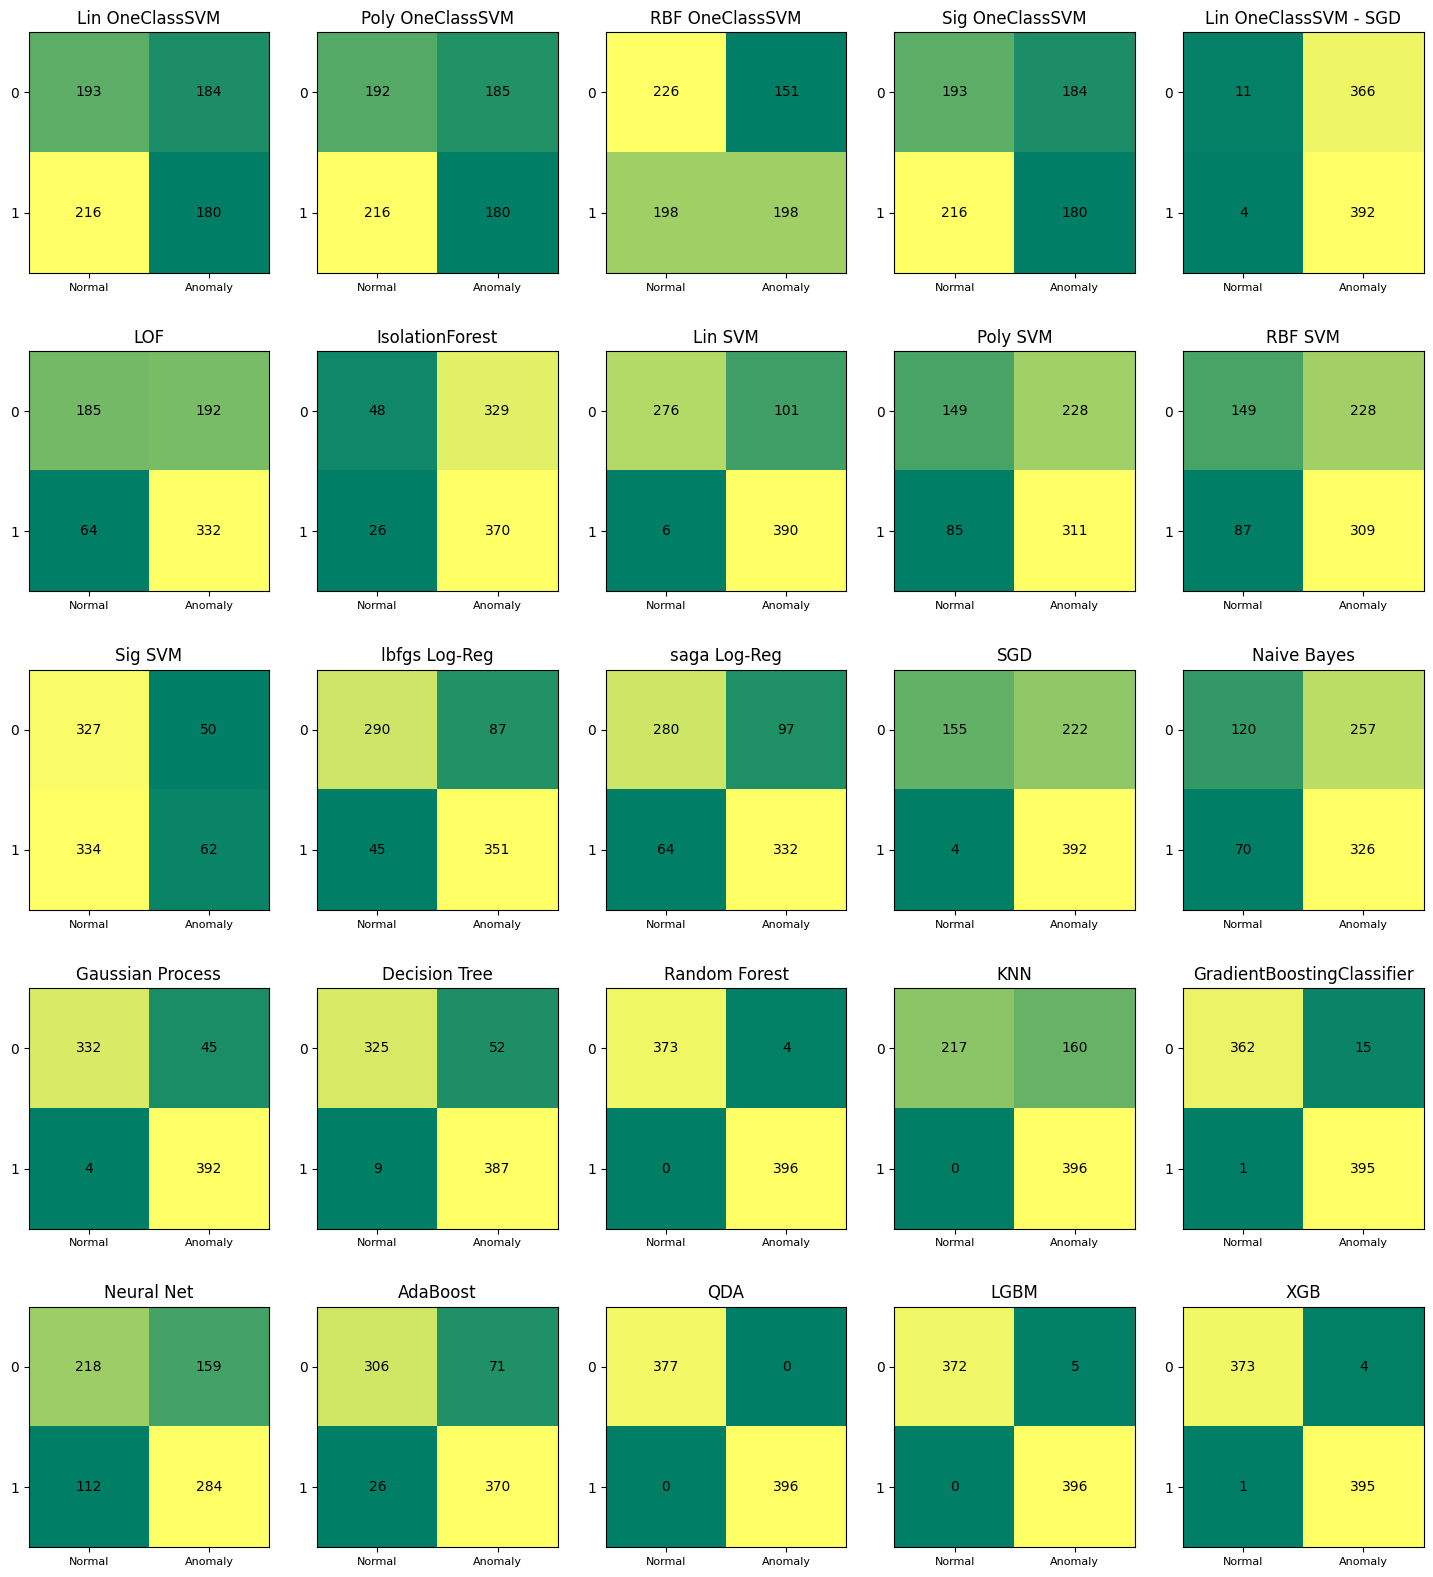

In [6]:
Metrics = runML()

In [7]:
result = pd.DataFrame(Metrics.values(), columns =['Training-time', 'Prediction-time', 'Accuracy'])
result.index = Metrics.keys()

print("\nClassifier for which max Accuracy is obtained:")
print(result.loc[result["Accuracy"].idxmax()])

print("\n\nClassifier for which min Training-time is obtained:")
print(result.loc[result["Training-time"].idxmin()])

print("\n\nClassifier for which min Prediction-time is obtained:")
print(result.loc[result["Prediction-time"].idxmin()])

print("\n\nResults of all the Classifiers:")
result.sort_values(by="Accuracy", ascending=False)


Classifier for which max Accuracy is obtained:
Training-time        1.275200
Prediction-time      0.026937
Accuracy           100.000000
Name: QDA, dtype: float64


Classifier for which min Training-time is obtained:
Training-time       0.005984
Prediction-time     0.093380
Accuracy           79.301423
Name: KNN, dtype: float64


Classifier for which min Prediction-time is obtained:
Training-time       2.068462
Prediction-time     0.004986
Accuracy           79.172057
Name: saga Log-Reg, dtype: float64


Results of all the Classifiers:


,Training-time,Prediction-time,Accuracy
QDA,1.275200,0.026937,100.000000
Random Forest,6.178463,0.025498,99.482536
XGB,8.649666,0.035977,99.353169
LGBM,2.553608,0.018970,99.353169
GradientBoostingClassifier,92.864798,0.009977,97.930142
Gaussian Process,19.299567,3.837325,93.661061
Decision Tree,3.078357,0.006979,92.108668
AdaBoost,10.694528,0.082804,87.451488
Lin SVM,2.337069,0.411759,86.157827
lbfgs Log-Reg,0.295881,0.007982,82.923674


---